In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter


first_year = "2000"
last_year = "2022"

# Gross Regional Product(100 million yuan)

data_real_gdp = pd.read_excel("data/PRC.xlsx")
file_path = 'data/PRC.xlsx'
data = pd.read_excel(file_path)
data = data.set_index("Region")
data = data.astype(float)
data = data.multiply(1_000_000)
data.head()

/var/folders/gt/hp_y969x7hgchgtzlj0y7nhc0000gn/T/ipykernel_30513/1333110588.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Region,,,,,,,,,,,,,,,,,,,,,
Beijing,1.903130e+11,1.875260e+11,1.641580e+11,1.617760e+11,1.509620e+11,1.361720e+11,1.233910e+11,1.136920e+11,1.067320e+11,1.005690e+11,...,2.205400e+10,1.962500e+10,1.694900e+10,1.449500e+10,1.276200e+10,1.028000e+10,8.030000e+09,6.468000e+09,NaN,NaN
Tianjin,1.192350e+11,1.136600e+11,1.010680e+11,1.015570e+11,9.568900e+10,8.728000e+10,7.964700e+10,7.586800e+10,7.496000e+10,7.134500e+10,...,1.498500e+10,1.408600e+10,1.314200e+10,1.173400e+10,9.769000e+09,7.751000e+09,5.800000e+09,4.481000e+09,NaN,NaN
Hebei,5.699500e+10,5.418100e+10,4.830200e+10,4.703600e+10,4.380800e+10,4.145100e+10,3.868800e+10,3.599400e+10,3.450700e+10,3.334600e+10,...,6.310000e+09,5.994000e+09,5.615000e+09,4.950000e+09,4.212000e+09,3.324000e+09,2.571000e+09,2.046000e+09,NaN,NaN
Shanxi,7.367500e+10,6.562500e+10,5.105100e+10,4.846900e+10,4.551700e+10,4.124200e+10,3.397200e+10,3.359300e+10,3.424800e+10,3.384800e+10,...,5.230000e+09,5.104000e+09,4.724000e+09,4.178000e+09,3.515000e+09,2.729000e+09,2.271000e+09,1.862000e+09,NaN,NaN
Inner Mongolia,9.647400e+10,8.813700e+10,7.164000e+10,7.117000e+10,6.649100e+10,6.119600e+10,5.656000e+10,5.297200e+10,4.958500e+10,4.632000e+10,...,5.861000e+09,5.406000e+09,4.980000e+09,4.457000e+09,3.772000e+09,3.094000e+09,2.423000e+09,1.906000e+09,NaN,NaN


In [2]:
cpi_data = pd.read_excel(file_path, sheet_name='CPI')
cpi_data = cpi_data.set_index("Region")
cpi_data = cpi_data.astype(float)
cpi_data = cpi_data.div(100)
cpi_data.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Region,,,,,,,,,,,,,,,,,,,,,
Beijing,1.018,1.011,1.017,1.023,1.025,1.019,1.014,1.018,1.016,1.033,...,1.006,1.024,1.053,1.116,1.173,1.249,1.190,1.099,1.119,1.054
Tianjin,1.019,1.013,1.020,1.027,1.020,1.021,1.021,1.017,1.019,1.031,...,0.989,0.995,1.031,1.090,1.153,1.240,1.176,1.114,1.102,1.030
Hebei,1.018,1.010,1.021,1.030,1.024,1.017,1.015,1.009,1.017,1.030,...,0.981,0.984,1.035,1.071,1.152,1.226,1.138,1.061,1.034,1.006
Shanxi,1.021,1.010,1.029,1.027,1.018,1.011,1.011,1.006,1.017,1.031,...,0.996,0.986,1.031,1.079,1.169,1.252,1.151,1.073,1.048,1.022
Inner Mongolia,1.018,1.009,1.019,1.024,1.018,1.017,1.012,1.011,1.016,1.032,...,0.998,0.993,1.045,1.076,1.175,1.229,1.141,1.074,1.046,1.023


In [3]:
cpi_data.columns
cpi_data_rev = cpi_data
cpi_data = cpi_data.iloc[:, ::-1]
cpi_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,,
Beijing,1.054,1.119,1.099,1.190,1.249,1.173,1.116,1.053,1.024,1.006,...,1.033,1.016,1.018,1.014,1.019,1.025,1.023,1.017,1.011,1.018
Tianjin,1.030,1.102,1.114,1.176,1.240,1.153,1.090,1.031,0.995,0.989,...,1.031,1.019,1.017,1.021,1.021,1.020,1.027,1.020,1.013,1.019
Hebei,1.006,1.034,1.061,1.138,1.226,1.152,1.071,1.035,0.984,0.981,...,1.030,1.017,1.009,1.015,1.017,1.024,1.030,1.021,1.010,1.018
Shanxi,1.022,1.048,1.073,1.151,1.252,1.169,1.079,1.031,0.986,0.996,...,1.031,1.017,1.006,1.011,1.011,1.018,1.027,1.029,1.010,1.021
Inner Mongolia,1.023,1.046,1.074,1.141,1.229,1.175,1.076,1.045,0.993,0.998,...,1.032,1.016,1.011,1.012,1.017,1.018,1.024,1.019,1.009,1.018


In [4]:
adjusted_cpi = cpi_data


adjusted_cpi_post_2010 = cpi_data.loc[:, 2011:].cumprod(axis=1)
adjusted_cpi_post_2010[2010] = 1
adjusted_cpi_pre_2010 = 1 / cpi_data_rev.loc[:, 2009:].cumprod(axis=1)

adjusted_cpi = pd.merge(adjusted_cpi_post_2010, adjusted_cpi_pre_2010, left_index=True, right_index=True)
adjusted_cpi.columns = adjusted_cpi.columns.astype(int)
adjusted_cpi = adjusted_cpi.sort_index(axis=1, ascending=False)
adjusted_cpi.loc[:, [2008,2009,2010,2011,2012]]

,2008,2009,2010,2011,2012
Region,,,,,
Beijing,0.965964,1.015228,1,1.056,1.090848
Tianjin,0.958350,1.010101,1,1.049,1.077323
Hebei,0.948257,1.007049,1,1.057,1.084482
Shanxi,0.936582,1.004016,1,1.052,1.078300
Inner Mongolia,0.948921,1.003009,1,1.056,1.088736
Liaoning,0.956023,1.000000,1,1.052,1.081456
Jilin,0.950524,0.999001,1,1.052,1.078300
Heilongjiang,0.945080,0.998004,1,1.058,1.091856
Shanghai,0.948975,1.004016,1,1.052,1.081456


In [5]:
real_gdp_data = data.div(adjusted_cpi.values)
real_gdp_data = real_gdp_data.reset_index(drop=False)
real_gdp_data.head()

,Region,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Beijing,1.439895e+11,1.444348e+11,1.278272e+11,1.281139e+11,1.222998e+11,1.130758e+11,1.044094e+11,9.754923e+10,9.322586e+10,...,2.554354e+10,2.327573e+10,2.116733e+10,2.020247e+10,2.086426e+10,2.099132e+10,1.951233e+10,1.727274e+10,NaN,NaN
1,Tianjin,9.009447e+10,8.751373e+10,7.883003e+10,8.079566e+10,7.818269e+10,7.273836e+10,6.777101e+10,6.591115e+10,6.622940e+10,...,1.721967e+10,1.610567e+10,1.549214e+10,1.507726e+10,1.447291e+10,1.423918e+10,1.253033e+10,1.078437e+10,NaN,NaN
2,Hebei,4.350568e+10,4.210213e+10,3.790910e+10,3.769073e+10,3.615720e+10,3.503292e+10,3.325359e+10,3.140208e+10,3.037573e+10,...,7.482025e+09,6.993614e+09,6.780708e+09,6.402063e+09,6.275604e+09,6.071817e+09,5.344438e+09,4.512539e+09,NaN,NaN
3,Shanxi,5.712417e+10,5.195111e+10,4.081795e+10,3.987735e+10,3.845974e+10,3.547482e+10,2.954287e+10,2.953463e+10,3.029117e+10,...,6.563906e+09,6.316089e+09,6.027068e+09,5.751566e+09,5.656627e+09,5.498447e+09,5.266583e+09,4.633309e+09,NaN,NaN
4,Inner Mongolia,7.443905e+10,6.923036e+10,5.677865e+10,5.747786e+10,5.498782e+10,5.151983e+10,4.842635e+10,4.589858e+10,4.343645e+10,...,7.196337e+09,6.591209e+09,6.345044e+09,6.110268e+09,6.076131e+09,6.125304e+09,5.473264e+09,4.624025e+09,NaN,NaN


In [6]:
data_real_gdp = real_gdp_data.melt(["Region"], var_name="Year", value_name="Real GDP per capita")
data_real_gdp["log GDP per capita"] = numpy.log(data_real_gdp["Real GDP per capita"])
data_real_gdp = data_real_gdp.rename(columns={"Region": "GeoName"})
data_real_gdp["Year"] = data_real_gdp["Year"].astype(str)
data_real_gdp.to_csv("data/China_RealGDP.csv")
data_real_gdp

,GeoName,Year,Real GDP per capita,log GDP per capita
0,Beijing,2022,1.439895e+11,25.693006
1,Tianjin,2022,9.009447e+10,25.224125
2,Hebei,2022,4.350568e+10,24.496157
3,Shanxi,2022,5.712417e+10,24.768493
4,Inner Mongolia,2022,7.443905e+10,25.033246
...,...,...,...,...
1018,Shaanxi,1990,NaN,NaN
1019,Gansu,1990,NaN,NaN
1020,Qinghai,1990,NaN,NaN
1021,Ningxia,1990,NaN,NaN


In [7]:
data_real_gdp_sigma = data_real_gdp.groupby("Year")["log GDP per capita"].std().to_frame()
data_real_gdp_sigma["Region"] = "China"
data_real_gdp_sigma.to_csv("data/China_sigma.csv")
data_real_gdp_sigma

,log GDP per capita,Region
Year,,
1990,NaN,China
1991,NaN,China
1992,0.475606,China
1993,0.493199,China
1994,0.495468,China
1995,0.495947,China
1996,0.490255,China
1997,0.498905,China
1998,0.506289,China


In [8]:
data_growth = data_real_gdp[data_real_gdp["Year"].isin([first_year, last_year])].reset_index(drop=True)
data_growth = data_growth.sort_values(["GeoName", "Year"]).reset_index(drop=True)
data_growth[f"log GDP per capita {first_year}"] = data_growth.groupby("GeoName")["log GDP per capita"].shift()
data_growth[f"Real GDP per capita {first_year}"] = data_growth.groupby("GeoName")["Real GDP per capita"].shift()
data_growth = data_growth[data_growth["Year"] == last_year]
data_growth["Ratio"] = data_growth["log GDP per capita"] / data_growth[f"log GDP per capita {first_year}"]
data_growth = data_growth.rename(columns={"Real GDP per capita": f"Real GDP per capita {last_year}"})
data_growth = data_growth.drop(columns="Year")
data_growth["Region"] = "China"
data_growth

,GeoName,Real GDP per capita 2022,log GDP per capita,log GDP per capita 2000,Real GDP per capita 2000,Ratio,Region
1,Anhui,5.667508e+10,24.760601,22.553055,6.232570e+09,1.097882,China
3,Beijing,1.439895e+11,25.693006,24.083610,2.879910e+10,1.066825,China
5,Chongqing,7.022385e+10,24.974954,22.714483,7.324442e+09,1.099517,China
7,Fujian,9.841829e+10,25.312493,23.295750,1.309832e+10,1.086571,China
9,Gansu,3.435969e+10,24.260150,22.389583,5.292641e+09,1.083546,China
11,Guangdong,7.626698e+10,25.057506,23.410489,1.469083e+10,1.070354,China
13,Guangxi,3.893608e+10,24.385187,22.458228,5.668712e+09,1.085802,China
15,Guizhou,4.076423e+10,24.431071,21.941069,3.379753e+09,1.113486,China
17,Hainan,4.899783e+10,24.615042,22.813985,8.090735e+09,1.078945,China
19,Hebei,4.350568e+10,24.496157,22.853858,8.419848e+09,1.071861,China


In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_reg = data_growth.rename(columns={"Ratio": "y", f"log GDP per capita {first_year}": "x"})

formula = f"y ~ x"
mod = smf.ols(formula=formula, data=data_reg)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     42.18
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           4.14e-07
Time:                        13:28:00   Log-Likelihood:                 102.71
No. Observations:                  31   AIC:                            -201.4
Df Residuals:                      29   BIC:                            -198.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5681      0.075     21.037      0.000       1.416       1.721
x             -0.0211      0.003     -6.495      0.000      -0.028      -0.014
==============================================================================
Omnibus:                        1.966   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.417
Skew:                          -0.305   Prob(JB):                        0.492
Kurtosis:                       2.148   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
influence = OLSInfluence(results)
data_reg['influence'] = influence.cooks_distance[0]
data_growth["influence"] = data_reg["influence"]
data_growth = data_growth[data_growth["influence"] < 1]
data_growth.to_csv("data/China.csv", index=False)

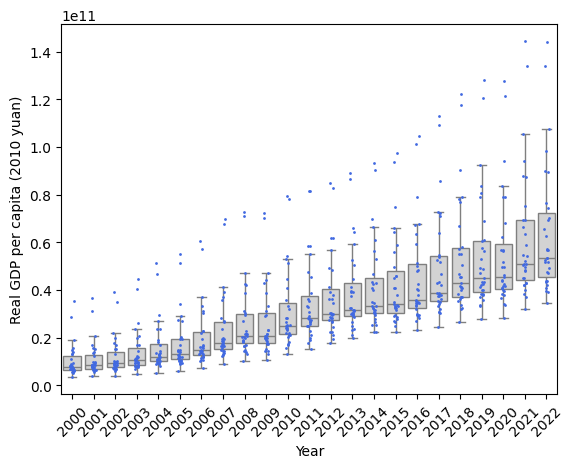

In [11]:
data_real_gdp = data_real_gdp.sort_values(by="Year")
data_real_gdp = data_real_gdp[data_real_gdp["Year"] >= "2000"]
sns.boxplot(
    data_real_gdp, x="Year", y="Real GDP per capita", color="#D3D3D3",  showfliers = False
)
ax = sns.stripplot(data_real_gdp, x="Year", y="Real GDP per capita", size=2, color="royalblue")
ax.set_ylabel("Real GDP per capita (2010 yuan)")
ax.tick_params(axis='x', rotation=45)
ax.figure.savefig("fig_output/Fig_03.png", dpi=600)

In [12]:
data_real_gdp_pivot = pd.pivot(data_real_gdp, columns="Year", index="GeoName", values="Real GDP per capita")

def hp_filter(row):
    cycle, trend = hpfilter(row[1:], lamb=6.25)
    return trend

data_real_gdp_pivot = data_real_gdp_pivot.apply(hp_filter, axis=1)
data_real_gdp_pivot.to_csv("data/china_filtered.csv")
data_real_gdp_pivot

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
GeoName,,,,,,,,,,,,,,,,,,,,,
Anhui,6.540907e+09,7.462679e+09,8.440740e+09,9.531563e+09,1.079493e+10,1.233977e+10,1.422053e+10,1.642480e+10,1.896800e+10,2.185357e+10,...,3.054259e+10,3.321961e+10,3.594377e+10,3.888989e+10,4.205983e+10,4.526379e+10,4.827910e+10,5.113854e+10,5.403648e+10,5.689865e+10
Beijing,3.022388e+10,3.551011e+10,4.096127e+10,4.662471e+10,5.242508e+10,5.826622e+10,6.385978e+10,6.874018e+10,7.301655e+10,7.715258e+10,...,8.934373e+10,9.407508e+10,9.952645e+10,1.057864e+11,1.126270e+11,1.196003e+11,1.263298e+11,1.328712e+11,1.395654e+11,1.459465e+11
Chongqing,8.063216e+09,9.422144e+09,1.083823e+10,1.236938e+10,1.408460e+10,1.611110e+10,1.853878e+10,2.136013e+10,2.455470e+10,2.815337e+10,...,3.929492e+10,4.288117e+10,4.646215e+10,5.006086e+10,5.360487e+10,5.702401e+10,6.039872e+10,6.381380e+10,6.734146e+10,7.078012e+10
Fujian,1.306860e+10,1.479750e+10,1.661439e+10,1.863812e+10,2.100492e+10,2.387858e+10,2.728719e+10,3.108325e+10,3.523386e+10,3.968836e+10,...,5.233422e+10,5.639390e+10,6.072135e+10,6.558002e+10,7.095870e+10,7.651114e+10,8.189493e+10,8.717952e+10,9.270623e+10,9.825851e+10
Gansu,5.320528e+09,6.114919e+09,6.971253e+09,7.931392e+09,9.007877e+09,1.021040e+10,1.150095e+10,1.282499e+10,1.422518e+10,1.580502e+10,...,2.045365e+10,2.162752e+10,2.262738e+10,2.363821e+10,2.479018e+10,2.614780e+10,2.770272e+10,2.948342e+10,3.153587e+10,3.369472e+10
Guangdong,1.509315e+10,1.795710e+10,2.092951e+10,2.406476e+10,2.738428e+10,3.085030e+10,3.432153e+10,3.757578e+10,4.058883e+10,4.352166e+10,...,5.107575e+10,5.367299e+10,5.652090e+10,5.956107e+10,6.265160e+10,6.557905e+10,6.829979e+10,7.095983e+10,7.378298e+10,7.655936e+10
Guangxi,5.892129e+09,6.726348e+09,7.606944e+09,8.584689e+09,9.693706e+09,1.098802e+10,1.247023e+10,1.409465e+10,1.588819e+10,1.789731e+10,...,2.358113e+10,2.526013e+10,2.692555e+10,2.861471e+10,3.032674e+10,3.201844e+10,3.367413e+10,3.536986e+10,3.719364e+10,3.900620e+10
Guizhou,3.366193e+09,3.937908e+09,4.561983e+09,5.290945e+09,6.172149e+09,7.226077e+09,8.454698e+09,9.825969e+09,1.136133e+10,1.315781e+10,...,1.981403e+10,2.229943e+10,2.488665e+10,2.754540e+10,3.022389e+10,3.278498e+10,3.513548e+10,3.730067e+10,3.937197e+10,4.134962e+10
Hainan,8.450421e+09,9.461462e+09,1.049825e+10,1.161031e+10,1.286809e+10,1.437724e+10,1.616198e+10,1.818376e+10,2.043914e+10,2.296319e+10,...,3.013255e+10,3.217679e+10,3.409443e+10,3.593786e+10,3.776128e+10,3.961894e+10,4.158785e+10,4.378344e+10,4.628474e+10,4.881524e+10
